# Transport equation

## libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from tqdm import tqdm_notebook
from matplotlib import animation
from IPython.display import HTML

## initialization

In [2]:
check = 0.75
A = 0.025
LENGTH = 5
DURATION = 100
INITIAL = 0
BOUND = 5

NUMBER_X = 101
NUMBER_T = int(A * DURATION * NUMBER_X / check / LENGTH)

In [3]:
step_x = LENGTH / (NUMBER_X - 1)
step_t = DURATION / (NUMBER_T - 1)

In [4]:
axis = np.linspace(0, LENGTH, NUMBER_X)
time = np.linspace(0, DURATION, NUMBER_T)

function = pd.DataFrame(columns = np.concatenate([['x'], time]))

In [5]:
function['x'] = axis
function = function.set_index('x')

In [6]:
function.iloc[:,0] = INITIAL
function.iloc[0] = BOUND
function.iloc[NUMBER_X-1,:] = INITIAL

In [7]:
def smooth(f, x, t):
    q = 0.4
    dmm = f.iloc[x-1, t+1] - f.iloc[x-2, t+1]
    dm = f.iloc[x, t+1] - f.iloc[x-1, t+1]
    dp = f.iloc[x+1, t+1] - f.iloc[x, t+1]
    dpp = f.iloc[x+2, t+1] - f.iloc[x+1, t+1]
    
    if (dpp * dp < 0) or (dm * dp < 0):
        q_plus = dp
    else:
        q_plus = 0
        
    if (dmm * dm < 0) or (dm * dp < 0):
        q_minus = dm
    else:
        q_minus = 0   
        
    return f.iloc[x, t+1] + q * (q_plus - q_minus)

## main procedures

In [8]:
pbar = tqdm_notebook(total = NUMBER_T - 1)

for t in range(0, NUMBER_T - 1):
    for x in range(1, NUMBER_X - 1):
        f_plus = 0.5 * ((function.iloc[x+1,t] + function.iloc[x,t]) - 
                                      check * (function.iloc[x+1,t] - function.iloc[x,t]))
        
        f_minus = 0.5 * ((function.iloc[x,t] + function.iloc[x-1,t]) - 
                                      check * (function.iloc[x,t] - function.iloc[x-1,t]))
        
        function.iloc[x,t+1] = function.iloc[x,t] - check * (f_plus - f_minus)
    
    for x in range(2, NUMBER_X - 2):
        function.iloc[x, t+1] = smooth(function, x, t)
        
    pbar.update()

## animated plot

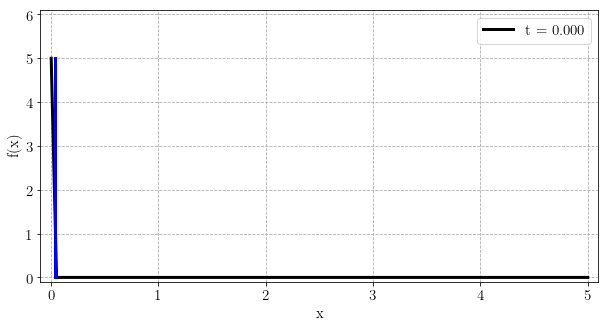

In [11]:
plt.rcParams.update({'font.size': 15})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[english]{babel}')

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis([-0.1, LENGTH + 0.1, -0.1, BOUND + 1.1])

l1, = ax.plot(function.index, function.iloc[:, NUMBER_T - 1], lw=3, color='black', label=NUMBER_T)
l2, = ax.plot([ A * float(function.columns[20]), A * float(function.columns[20])],[0, BOUND], lw=3, color='blue', label=None)

ax.grid(c='#aaaaaa', ls='--')

ax.set_ylabel("f(x)")
ax.set_xlabel("x")

def animate(i):
    l1.set_data(function.index, function.iloc[:, i])
    l1.set_label('t = ' + '%.3f' % (i * step_t))
    l2.set_data([A * float(function.columns[i+1]), A * float(function.columns[i+1])],[0, BOUND])

    legend = plt.legend(loc='upper right')
    return l1, l2, legend

ani = animation.FuncAnimation(fig, animate, frames= np.arange(0, NUMBER_T - 1, 10), interval=100)

# ani.save("movie.mp4")
HTML(ani.to_jshtml())

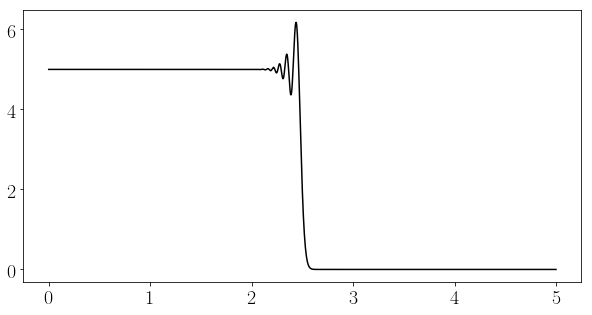

<Figure size 1800x1080 with 0 Axes>

In [10]:
# fig, ax = plt.subplots(figsize=(10, 5))
# plt.figure(figsize=(25,15))
# plt.rcParams.update({'font.size': 20})
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
# plt.rc('text.latex', preamble=r'\usepackage[english]{babel}')

# ax.plot(function.index * LENGTH / NUMBER_X,function.iloc[:,1001], label="100", c='black')